In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
my_year_month_fmt = mdates.DateFormatter('%m/%y')

In [2]:
df1 = pd.read_csv("/Users/leon.zhao/Desktop/py/Book3.csv" ,index_col=0)
df1.index = pd.to_datetime(df1.index)

In [32]:
df1.head()

,ITEMS_POSTED
ACTIVITY_DATE_PACIFIC_TIME,
2015-01-01,43689
2015-01-02,55367
2015-01-03,64978
2015-01-04,62538
2015-01-05,57753


In [33]:
short_rolling = df1.rolling(window=20).mean()
short_rolling.head(20)

,ITEMS_POSTED
ACTIVITY_DATE_PACIFIC_TIME,
2015-01-01,NaN
2015-01-02,NaN
2015-01-03,NaN
2015-01-04,NaN
2015-01-05,NaN
2015-01-06,NaN
2015-01-07,NaN
2015-01-08,NaN
2015-01-09,NaN


In [36]:
long_rolling = df1.rolling(window=100).mean()
long_rolling.tail()

,ITEMS_POSTED
ACTIVITY_DATE_PACIFIC_TIME,
2018-12-02,567915.56
2018-12-03,567226.31
2018-12-04,566998.45
2018-12-05,566817.33
2018-12-06,561191.88


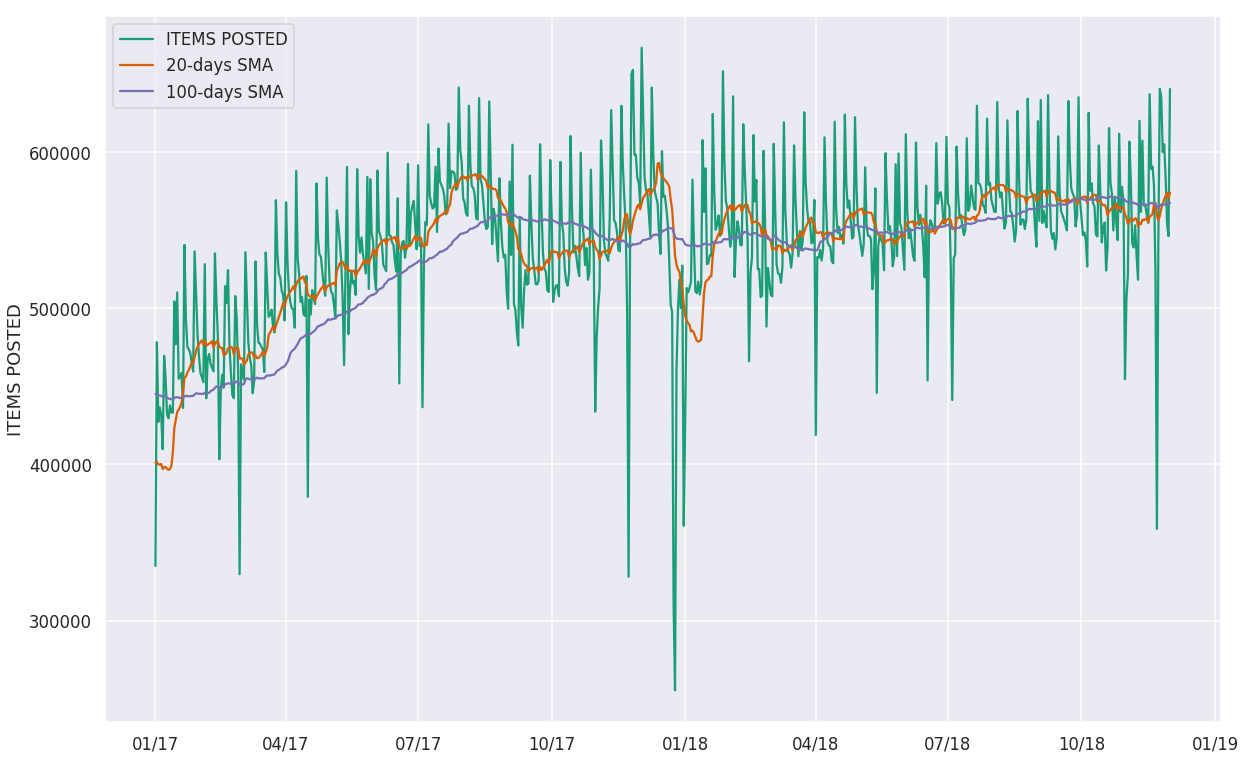

In [42]:
start_date = '2017-01-01'
end_date = '2018-12-01'

fig, ax = plt.subplots(figsize=(20,13))

ax.plot(df1.loc[start_date:end_date, :].index, df1.loc[start_date:end_date, 'ITEMS_POSTED'], label='ITEMS POSTED')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'ITEMS_POSTED'], label='20-days SMA')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'ITEMS_POSTED'], label='100-days SMA')

ax.legend(loc='best')
ax.set_ylabel('ITEMS POSTED')
ax.xaxis.set_major_formatter(my_year_month_fmt)


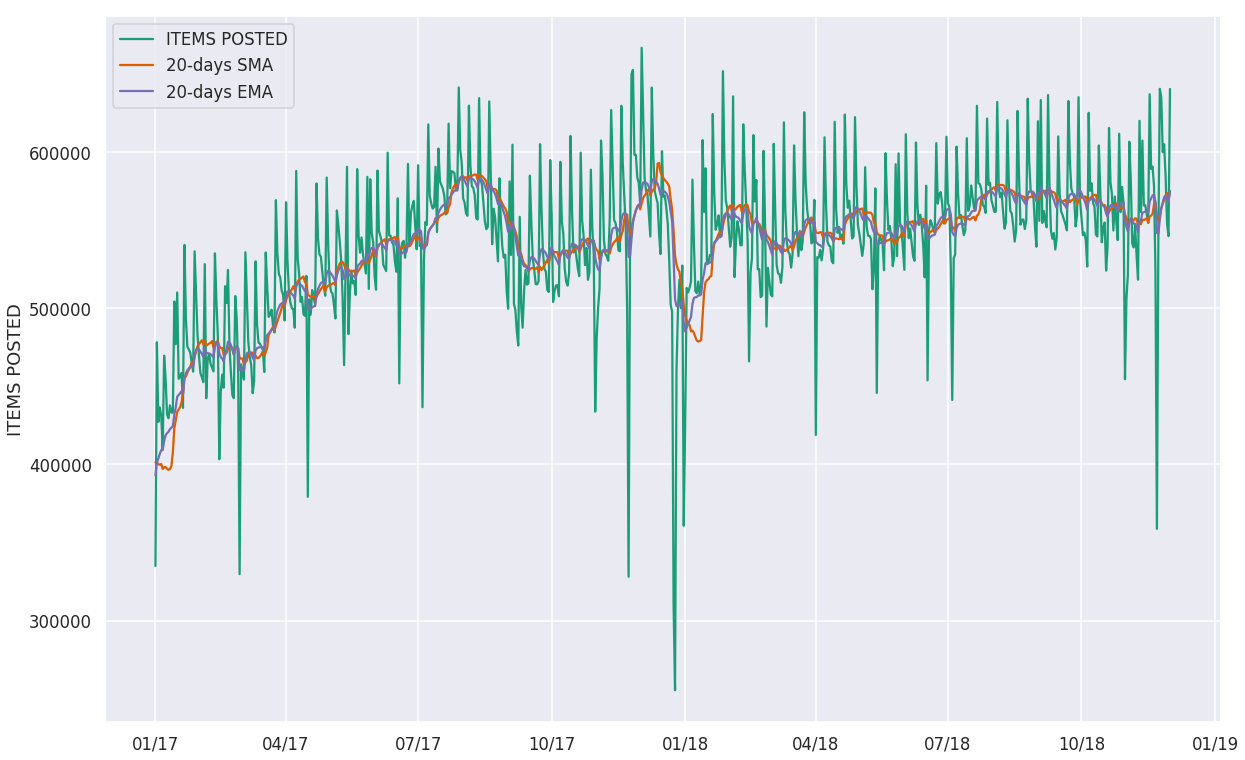

In [44]:
ema_short = df1.ewm(span=20, adjust=False).mean()

fig, ax = plt.subplots(figsize=(20,13))

ax.plot(df1.loc[start_date:end_date, :].index, df1.loc[start_date:end_date, 'ITEMS_POSTED'], label='ITEMS POSTED')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'ITEMS_POSTED'], label='20-days SMA')
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'ITEMS_POSTED'], label='20-days EMA')

ax.legend(loc='best')
ax.set_ylabel('ITEMS POSTED')
ax.xaxis.set_major_formatter(my_year_month_fmt)

<Figure size 432x288 with 0 Axes>

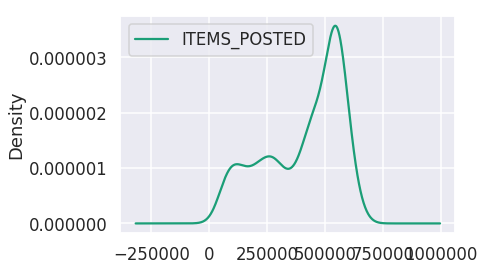